## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [ ]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
"""
Your code here
"""
import numpy as np
def preproc_x(x, flatten=True):
    x = (x - np.mean(x)) / (x.max() - x.min())
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [11]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[2048, 1024, 512, 256, 128, 64, 32, 16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
            
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 2048)              6293504   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 1024)              2098176   
_________________________________________________________________
hidden_layer3 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 64)                8256

In [13]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [14]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [15]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 60s 1ms/step - loss: 1.8476 - accuracy: 0.3393 - val_loss: 1.6250 - val_accuracy: 0.4199
Epoch 2/100
50000/50000 [==============================] - 60s 1ms/step - loss: 1.5514 - accuracy: 0.4546 - val_loss: 1.4965 - val_accuracy: 0.4769
Epoch 3/100
50000/50000 [==============================] - 61s 1ms/step - loss: 1.4107 - accuracy: 0.5075 - val_loss: 1.4557 - val_accuracy: 0.4930
Epoch 4/100
50000/50000 [==============================] - 61s 1ms/step - loss: 1.3040 - accuracy: 0.5437 - val_loss: 1.4089 - val_accuracy: 0.5089
Epoch 5/100
50000/50000 [==============================] - 64s 1ms/step - loss: 1.2016 - accuracy: 0.5791 - val_loss: 1.3472 - val_accuracy: 0.5396
Epoch 6/100
50000/50000 [==============================] - 65s 1ms/step - loss: 1.1072 - accuracy: 0.6113 - val_loss: 1.3670 - val_accuracy: 0.5353
Epoch 7/100
50000/50000 [==============================] - 65s

Epoch 56/100
50000/50000 [==============================] - 66s 1ms/step - loss: 0.0685 - accuracy: 0.9791 - val_loss: 2.8979 - val_accuracy: 0.5452
Epoch 57/100
50000/50000 [==============================] - 67s 1ms/step - loss: 0.0628 - accuracy: 0.9799 - val_loss: 3.3213 - val_accuracy: 0.5561
Epoch 58/100
50000/50000 [==============================] - 69s 1ms/step - loss: 0.0608 - accuracy: 0.9810 - val_loss: 3.2347 - val_accuracy: 0.5564
Epoch 59/100
50000/50000 [==============================] - 66s 1ms/step - loss: 0.0538 - accuracy: 0.9829 - val_loss: 3.3353 - val_accuracy: 0.5547
Epoch 60/100
50000/50000 [==============================] - 66s 1ms/step - loss: 0.0651 - accuracy: 0.9803 - val_loss: 2.9329 - val_accuracy: 0.5528
Epoch 61/100
50000/50000 [==============================] - 66s 1ms/step - loss: 0.0641 - accuracy: 0.9805 - val_loss: 2.9828 - val_accuracy: 0.5502
Epoch 62/100
50000/50000 [==============================] - 66s 1ms/step - loss: 0.0573 - accuracy: 0.9825

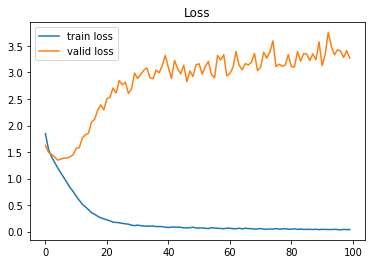

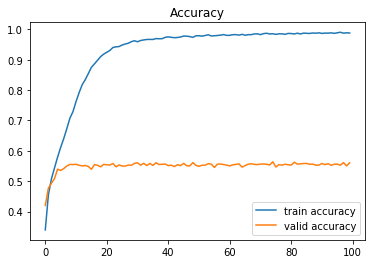

In [16]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()